# CS5785 Assignment 1

**Part I. The Housing Prices**

[Yufan Zhang](https://yufanbruce.com/) (yz2894)

---

## Preparation

In [10]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# PATH variables
DATA_PATH = "./data/Part_I/"
IMG_PATH = "./img/Part_I"

if not os.path.exists(IMG_PATH):
    os.makedirs(IMG_PATH)

## Data Ingestion

In [12]:
# Load the training and test data
def load_data_from_csv(filename):
    """
    Load the data to a Pandas dataframe from a file
    
    Args:
        filename: string containing the path to the dataset
        
    Return:
        df: a Pandas dataframe containing the loaded data
    """
    df = pd.read_csv(
        os.path.join(DATA_PATH, filename),
        index_col=0
    )
    
    return df

df = load_data_from_csv("train.csv")
print(f"Shape of the training data: {df.shape}")
df_test = load_data_from_csv("test.csv")
print(f"Shape of the test data: {df_test.shape}")

df.head()

Shape of the training data: (1460, 80)
Shape of the test data: (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Get the descriptive statistics of numerical and categorical features
column_types = df.dtypes    # Get the data types of all columns

numerical_fea = column_types[column_types != 'object'].index.tolist()
categorical_fea = column_types[column_types == 'object'].index.tolist()

print(f"> Numerical features: ({len(numerical_fea)})")
print(numerical_fea)
print()

print(f"> Categorical features: ({len(categorical_fea)})")
print(categorical_fea)

> Numerical features: (37)
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

> Categorical features: (43)
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',

In [14]:
df[numerical_fea].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [15]:
df[categorical_fea].describe().transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


## Feature Engineering

### 1. Handling missing value

- For categorical features with over 30% NA values, drop the whole columns.
- For other categorical features with NA values, fill them with the mode of the features from the data points in the same neighborhood.
- For numerical features, fill them with the mean of the features from the data points in the same neighborhood.

In [16]:
# Calculate the percentage of NA values of categorical features
null_counts = df.loc[:, categorical_fea].isna().sum() / len(df)
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

null_counts

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
Electrical      0.000685
dtype: float64

In [17]:
# Determine the categorical features to be dropped
features_to_drop = list(
    null_counts[null_counts > 0.3]
    .sort_values(ascending=False)
    .index
)

print(f"Features to be dropped due to high amount of NA values: ({len(features_to_drop)})")
print(features_to_drop)

# Drop the columns in both train_df and test_df
df.drop(features_to_drop, axis=1, inplace=True)
df_test.drop(features_to_drop, axis=1, inplace=True)

print("\nAfter dropping the columns:")
print(f"Shape of the training data: {df.shape}")
print(f"Shape of the test data: {df_test.shape}")

Features to be dropped due to high amount of NA values: (6)
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

After dropping the columns:
Shape of the training data: (1460, 74)
Shape of the test data: (1459, 73)


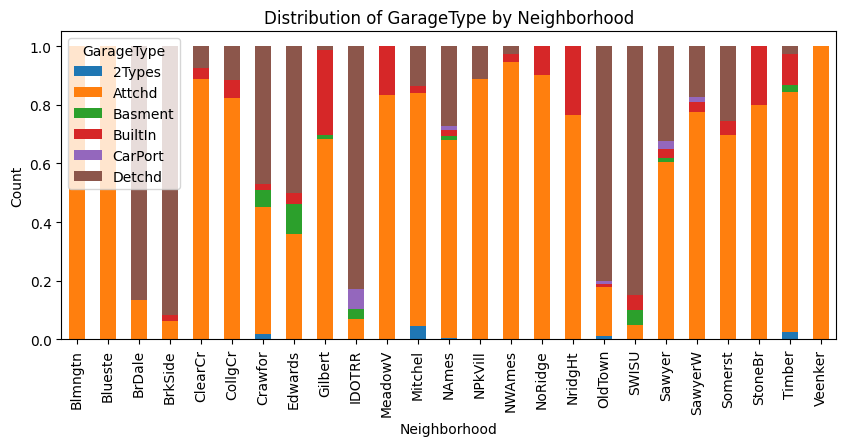

<Figure size 640x480 with 0 Axes>

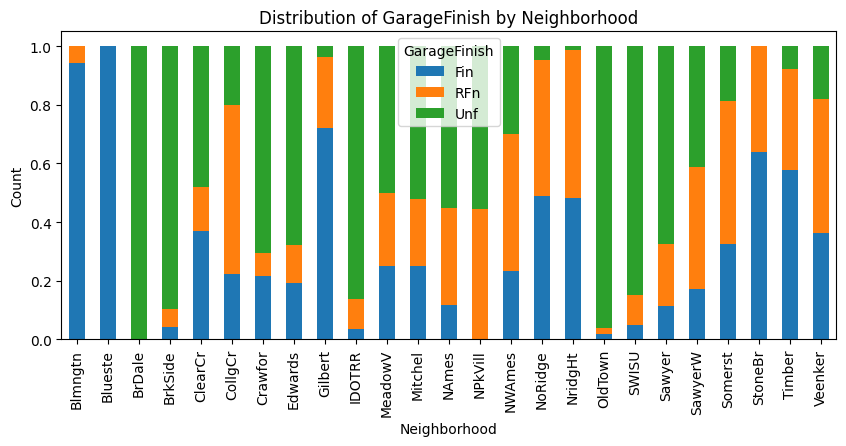

<Figure size 640x480 with 0 Axes>

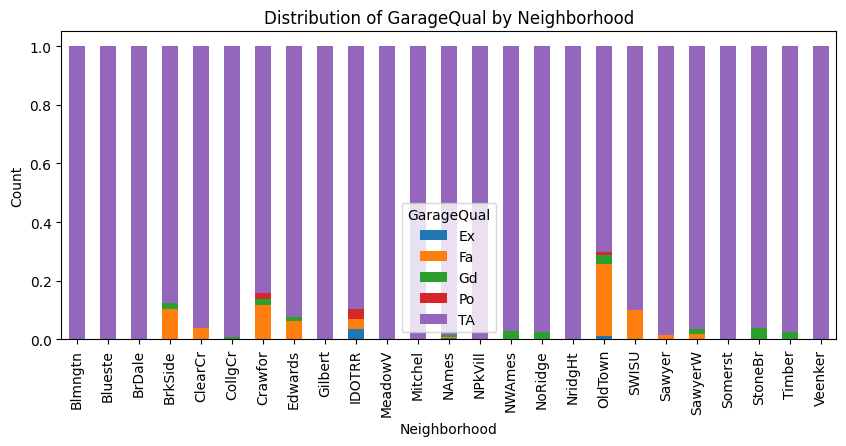

<Figure size 640x480 with 0 Axes>

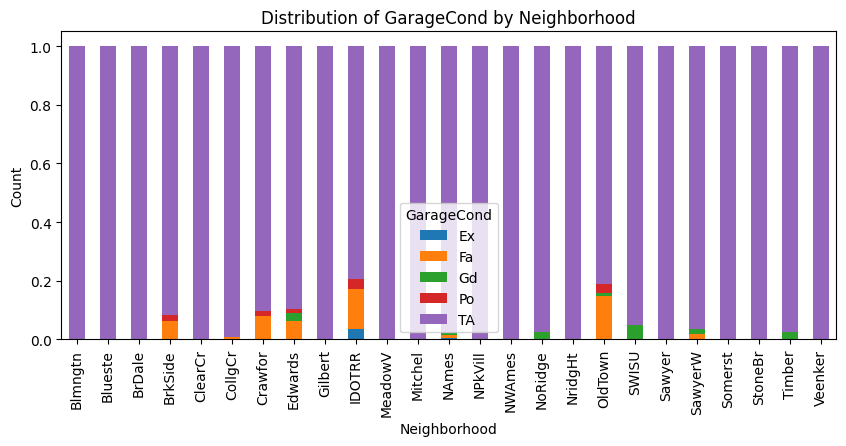

<Figure size 640x480 with 0 Axes>

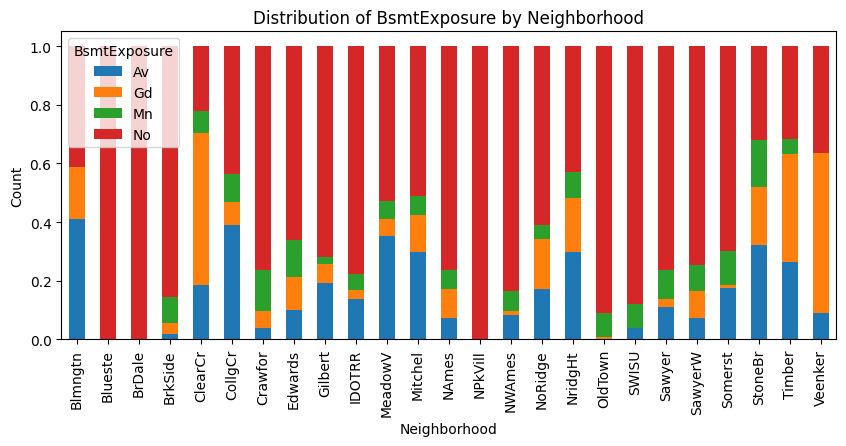

<Figure size 640x480 with 0 Axes>

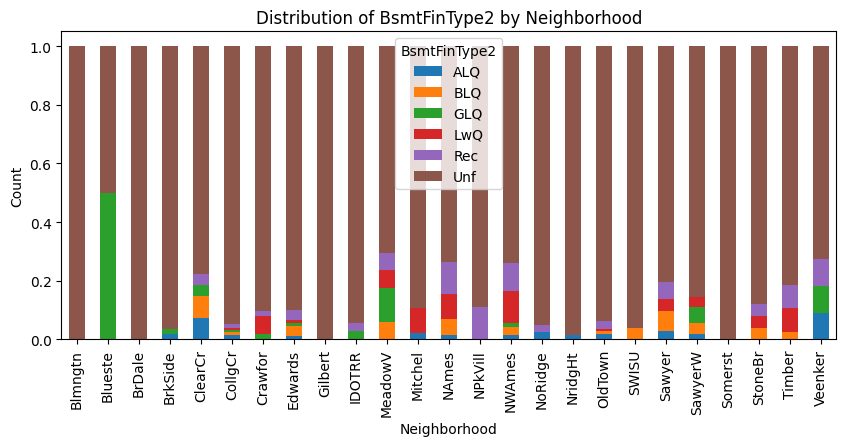

<Figure size 640x480 with 0 Axes>

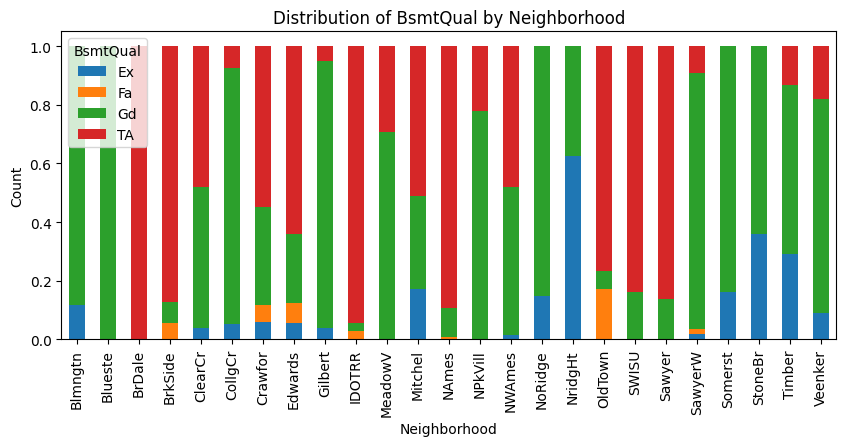

<Figure size 640x480 with 0 Axes>

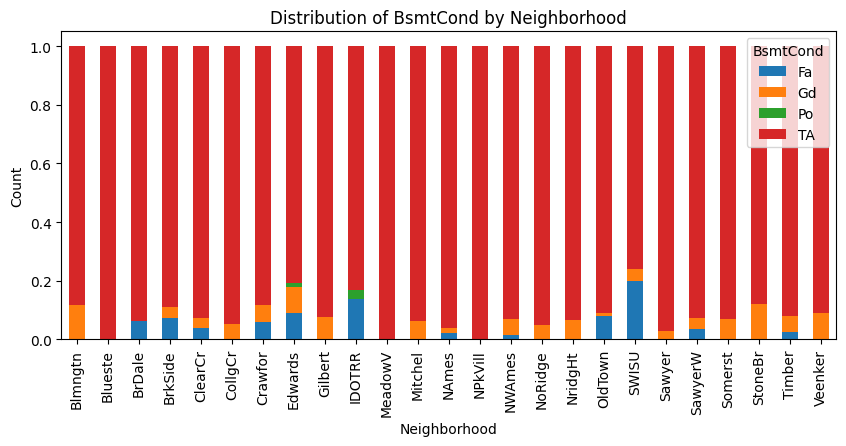

<Figure size 640x480 with 0 Axes>

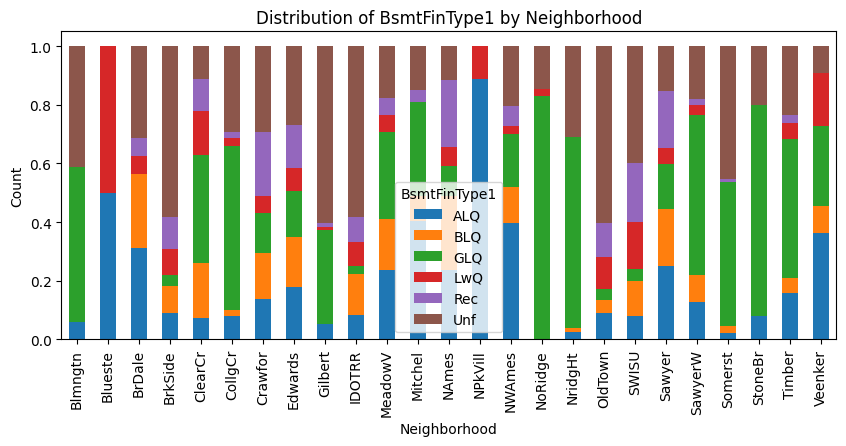

<Figure size 640x480 with 0 Axes>

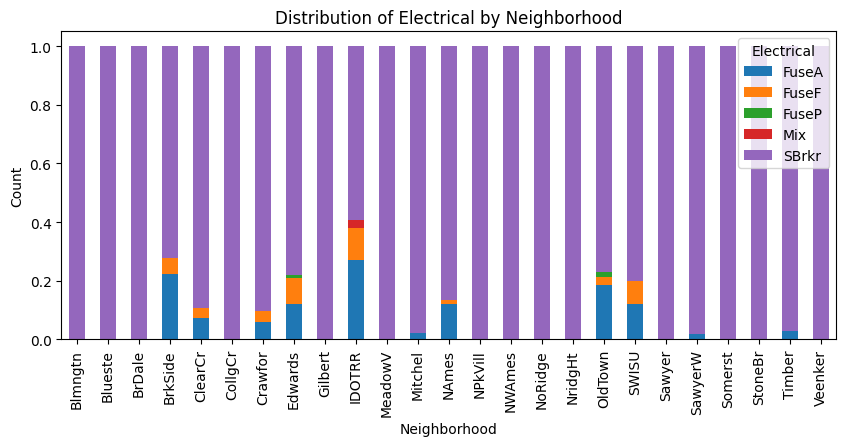

<Figure size 640x480 with 0 Axes>

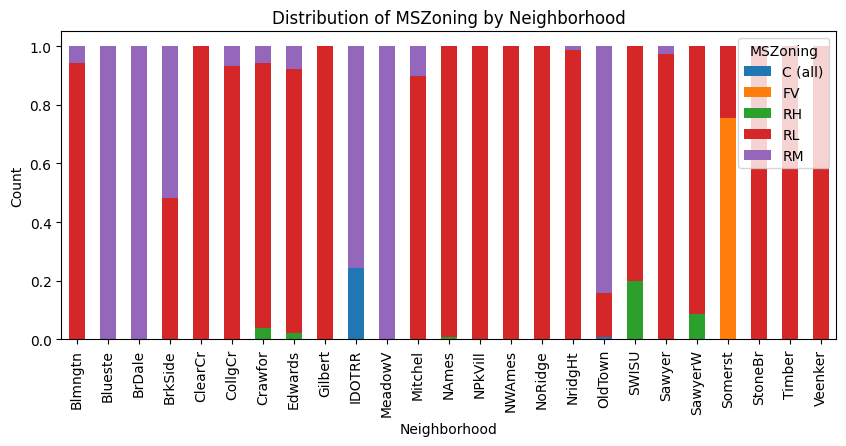

<Figure size 640x480 with 0 Axes>

In [18]:
# Get the remaining categorical features with NA values and its percentage
null_counts = null_counts[null_counts <= 0.3].sort_values(ascending=False)

features_to_fill = list(
    null_counts
    .sort_values(ascending=False)
    .index
)

features_to_fill += ["MSZoning"]  # Add MSZoning as it has NA values in the test set

# Initiate a dictionary to store the mode of each categorical feature
mode_dict = dict()

# Visualize the distribution of categorical features with NA values within each neighborhood
for i, feature in enumerate(features_to_fill):
    grouped = df.groupby(["Neighborhood", feature]).size().unstack().fillna(0)
    grouped = grouped.div(
        grouped.sum(axis=1), axis=0
    )  # Convert each column in grouped to percentage over row
    
    mode_dict[feature] = grouped.idxmax(axis=1).to_dict()  # Get the mode of each feature
    
    # Plot the stacked bar chart
    ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 4))

    # Add labels and title
    plt.xlabel('Neighborhood')
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} by Neighborhood')

    plt.legend(title=feature)
    plt.show()
    
    plt.savefig(os.path.join(IMG_PATH, f"{feature}_by_Neighborhood.png"))

As we can observe from the visualizations above, the missing values are not randomly distributed. Some neighborhoods have more missing values than others. In other words, the neighborhood is a good representative feature for each data point. Therefore, we can fill the missing values with the mode or mean of the features from the data points in the same neighborhood.

In [19]:
# Fill the NA values of categorical features with the most frequent value within each neighborhood with mode_dict
for feature in features_to_fill:
    df[feature] = df.apply(
        lambda x: mode_dict[feature][x["Neighborhood"]] if pd.isna(x[feature]) else x[feature],
        axis=1
    )
    
    df_test[feature] = df_test.apply(
        lambda x: mode_dict[feature][x["Neighborhood"]] if pd.isna(x[feature]) else x[feature],
        axis=1
    )

# Check if there is any NA values left in the categorical features
print(f"NA values in categorical features of train_df: {df[features_to_fill].isna().sum().sum()}")
print(f"NA values in categorical features of test_df: {df_test[features_to_fill].isna().sum().sum()}")

NA values in categorical features of train_df: 0
NA values in categorical features of test_df: 0


In [20]:
# Calculate the percentage of NA values of numerical features
null_counts = df.loc[:, numerical_fea].isna().sum() / len(df)
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

print(null_counts)

LotFrontage    0.177397
GarageYrBlt    0.055479
MasVnrArea     0.005479
dtype: float64


In [21]:
features_to_fill = list(null_counts.index)

# Initiate a dictionary to store the mean of numerical features within each neighborhood
mean_dict = dict()

# Update the mean_dict with the mean of each numerical feature within each neighborhood
for feature in features_to_fill:
    grouped = df.groupby("Neighborhood")[feature].mean()
    mean_dict[feature] = grouped.to_dict()
    
# Fill the NA values of numerical features with the mean of each feature within each neighborhood with mean_dict
for feature in features_to_fill:
    df[feature] = df.apply(
        lambda x: mean_dict[feature][x["Neighborhood"]] if pd.isna(x[feature]) else x[feature],
        axis=1
    )
    
    df_test[feature] = df_test.apply(
        lambda x: mean_dict[feature][x["Neighborhood"]] if pd.isna(x[feature]) else x[feature],
        axis=1
    )
    
# Check if there is any NA values left in the numerical features
print(f"NA values in numerical features of train_df: {df.isna().sum().sum()}")
print(f"NA values in numerical features of test_df: {df_test.isna().sum()}")

NA values in numerical features of train_df: 0
NA values in numerical features of test_df: MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 73, dtype: int64


In [22]:
# Get the columns where the test_df has NA values
na_columns = df_test.columns[df_test.isna().any()].tolist()
print(f"Columns with NA values in test_df: {na_columns}")

Columns with NA values in test_df: ['Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


In [24]:
for column in na_columns:
    if column in categorical_fea:
        df[column] = df.groupby('Neighborhood')[column].apply(lambda x: x.fillna(x.mode()[0]))
    else:
        df[column] = df.groupby('Neighborhood')[column].apply(lambda x: x.fillna(x.mean()))

TypeError: incompatible index of inserted column with frame index

### 2. Handling outliers

## Model Training

## Model Validation